In [42]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_pydot import graphviz_layout


In [5]:
infs = set()
def infinite(n1, n2):
    global infs
    visited = set()
    while n1 != n2:
        if n2 < n1: # sort n1 < n2
            n1, n2 = n2, n1
        # print(n1, n2)
        if (n1, n2) in infs or (n1, n2) in visited:
            # print("infinite\n")
            infs = infs.union(visited)
            return True
        visited.add((n1,n2))
        n1, n2 = n1*2, n2 - n1
    # print(n1, n2)
    # print("equal\n")
    return False

In [196]:
# banana_list = [1, 7, 3, 21, 13, 19]
banana_list = [1, 7, 3, 21, 13, 19, 51, 37]

# banana_list = [random.randint(1,int(10737418230/3)) for _ in range(4)]
# banana_list = [random.randint(1000,int(2000)) for _ in range(10)]

[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 6), (5, 7), (6, 7)]
[(6, 7), (3, 5), (1, 4)]
[(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 7), (5, 1), (5, 2), (5, 6), (5, 7), (6, 1), (6, 2), (6, 7), (7, 1), (7, 2), (1, 2)]
----------


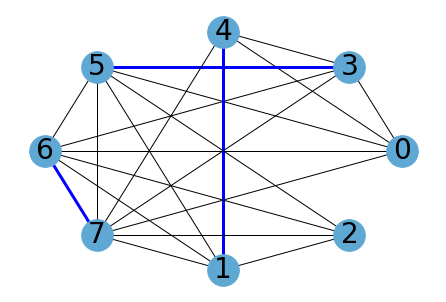

In [197]:
n = len(banana_list)
vs = list(range(n))
edges = [(i,j) for i in range(n) for j in range(i+1, n) if infinite(banana_list[i], banana_list[j])]

candidates = [e for e in edges]
pairs = []
while candidates:
    pair = candidates.pop()
    pairs.append(pair)
    candidates = [e for e in candidates if not (e[0] in pair or e[1] in pair)]
# print(vs)
print(edges)
print(pairs)
G = nx.Graph()
for e in edges:
    w = 3 if e in pairs else 1
    c = "blue" if e in pairs else "black"
    G.add_edge(*e, weight=w, color=c)
# G.add_edges_from(edges)
print(G.edges())
colors = [G[u][v]['color'] for u,v in G.edges()]
weights = [G[u][v]['weight'] for u,v in G.edges()]
pos = nx.circular_layout(G)

nx.draw(G, pos, edge_color=colors, width=weights, with_labels=True,node_size=1000,font_size=28,node_color='#5fa8d4')
print("-"*10)
# nx.draw(G,  font_weight='bold')
plt.show()

In [198]:
meta_root = -1
def ancestors(v, roots):
    head = v
    v_to_root = []
    print("root", v, roots)
    while head != meta_root:
        v_to_root.append(head)
        head = roots[head]
    print(v, v_to_root, roots)

    return v_to_root

In [199]:
def find_augmented(n, vs, edges, pairs): # sets
    vs = set(vs)
    edges = set(edges)

    blossoms = dict()
    b_roots = dict()
    exposed = vs - set([pair[0] for pair in pairs] + [pair[1] for pair in pairs])
    roots = {v: meta_root for v in exposed}
    F = {v for v in exposed}
    next_vs = {v for v in exposed}
    even_depths = {v for v in exposed}
    nbs = defaultdict(set)
    for e in edges:
        nbs[e[0]].add(e[1])
        nbs[e[1]].add(e[0])
    pair = dict()
    for e in pairs:
        pair[e[0]] = e[1]
        pair[e[1]] = e[0]
#     print("NBS", nbs)

    G2 = nx.Graph()
    G2.add_nodes_from(list(exposed))
#     pos = graphviz_layout(G2, prog="dot")
#     nx.draw(G2, pos, with_labels=True, font_weight='bold',node_size=100,font_size=28,
#             node_color='#5fa8d4',edge_color=[G2[u][v]['color'] for u,v in G2.edges()])
#     plt.show()
    
    while next_vs:
        v = next_vs.pop() # breadth better than depth
        next_ws = {a for a in nbs[v]}
        while next_ws:
            pos = graphviz_layout(G2, prog="dot")
            nx.draw(G2, pos, with_labels=True, font_weight='bold',node_size=100,font_size=28,
                    node_color='#5fa8d4',edge_color=[G2[u][v]['color'] for u,v in G2.edges()])
            plt.show()
            w = next_ws.pop()
            if not w in F:
                x = pair[w]
                F.add(x)
                F.add(w)
                roots[w] = v
                roots[x] = w
                next_vs.add(x)
                even_depths.add(x)
        #             nodes = []
        #             edges = []
        #             for node in roots:
        #                 nodes.append(node)
        #                 edges.append(nodes)
        #             nodes = list(roots.keys())
        #             for
                G2.add_edge(v, w, color="black")
                G2.add_edge(w, x, color="blue")
        #             subax1 = plt.subplot(121)
        #             subax2 = plt.subplot(122)

        # T = nx.balanced_tree(2, 5)

            else:
                if not w in even_depths:
                    pass
                else:
                    v_to_root = ancestors(v, roots) 
                    w_to_root = ancestors(w, roots) 
                    if v_to_root[-1] != w_to_root[-1]:
                        path = list(reversed(v_to_root)) + w_to_root # ish
                        print("___ blossoms")
                        print(blossoms)
                        print(b_roots)
#                         next_vs = False
#                         break
                        print("PATH", path)
#                         i = 0
#                         i = len(path) - 2
#                         while i>0: # i < len(path)-1:
                    
                        for i in reversed(range(len(path)-1)):
                            if path[i] in blossoms:
                                b_root = b_roots[path[i]]
                                blossom_path = []
                                head = path[i+1]
                                print("Head,", head)
                                while head != b_root:
                                    head = roots[head]
                                    print(head)
                                    blossom_path.append(head)
                                path = path[:i] + list(reversed(blossom_path)) + path[i+1:]
#                             i -= 1
                        return path
                    else:
                        root_to_v = list(reversed(v_to_root))
                        root_to_w = list(reversed(w_to_root))
                        for i in range(min(len(root_to_v),len(root_to_w))):
                            if root_to_v[i] != root_to_w[i]:
                                i -= 1
                                break

                        common_ancestor = root_to_v[i]
        #                     even = i % 2 == 0
                        cycle = root_to_v[i:] + w_to_root[:-i-1]
                        newV = n+1
                        n += 1
                        print("CYCLE")
                        print(root_to_v[i], root_to_w[i], v_to_root[-i-1], w_to_root[-i-1], "__", i, v_to_root, w_to_root)
                        print(cycle, newV)
                        blossoms[newV] = cycle
                        b_roots[newV] = b_roots[common_ancestor] if common_ancestor in b_roots else common_ancestor
                        roots[newV] = roots[common_ancestor]
                        for v1 in cycle:
                            del roots[v1]
        #                         roots[v] = roots[common_ancestor]
                        for v1 in roots:
                            if roots[v1] in cycle:
                                roots[v1] = newV
                        F = F.difference(cycle)
                        F.add(newV)
                        # next_vs = next_vs.difference(cycle)
                        if w in next_vs:
                            next_vs.remove(w)
                            next_vs.add(newV)
                        if common_ancestor in even_depths: #if i % 2 == 0:
                            even_depths.add(newV)
                        even_depths = even_depths.difference(cycle)
                        to_del = next_ws - nbs[v]
                        for v1 in cycle:
#                             print("Nbs", v1, nbs[v1])
                            for v2 in nbs[v1]:
#                                 print(v1, v2, nbs[v1], nbs[v2], newV, cycle)
                                if v2 == newV or v2 in cycle:
                                    continue
                                nbs[v2].remove(v1)
                                nbs[v2].add(newV)
                                nbs[newV].add(v2)
                            del nbs[v1]
                        print("AAAAAA"*3)
                        V0 = cycle[0]
                        for V1 in cycle[1:]:
                            G2 = nx.contracted_nodes(G2, V0, V1)
                        G2 = nx.relabel_nodes(G2, {V0: newV})
                        print(v, next_ws)
                        v = newV
                        next_ws = nbs[newV].difference(cycle)
                        print(v, next_ws)
        pos = graphviz_layout(G2, prog="dot")
        nx.draw(G2, pos, with_labels=True, font_weight='bold',node_size=100,font_size=28,
            node_color='#5fa8d4',edge_color=[G2[u][v]['color'] for u,v in G2.edges()])
        plt.show()
        return False

In [200]:
def find_augmented(n, vs, edges, pairs): # sets
    vs = set(vs)
    edges = set(edges)

    blossoms = dict()
    b_roots = dict()
    b_membership = dict()
    exposed = vs - set([pair[0] for pair in pairs] + [pair[1] for pair in pairs])
    roots = {v: meta_root for v in exposed}
    F = {v for v in exposed}
    next_vs = {v for v in exposed}
    even_depths = {v for v in exposed}
    nbs = defaultdict(set)
    for e in edges:
        nbs[e[0]].add(e[1])
        nbs[e[1]].add(e[0])
    pair = dict()
    for e in pairs:
        pair[e[0]] = e[1]
        pair[e[1]] = e[0]
#     print("NBS", nbs)

    G2 = nx.Graph()
    G2.add_nodes_from(list(exposed))
#     pos = graphviz_layout(G2, prog="dot")
#     nx.draw(G2, pos, with_labels=True, font_weight='bold',node_size=100,font_size=28,
#             node_color='#5fa8d4',edge_color=[G2[u][v]['color'] for u,v in G2.edges()])
#     plt.show()
    
    while next_vs:
        v = next_vs.pop() # breadth better than depth
        next_ws = {a for a in nbs[v]}
        while next_ws:
            pos = graphviz_layout(G2, prog="dot")
            nx.draw(G2, pos, with_labels=True, font_weight='bold',node_size=100,font_size=28,
                    node_color='#5fa8d4',edge_color=[G2[u][v]['color'] for u,v in G2.edges()])
            plt.show()
            w = next_ws.pop()
            if not w in F:
                x = pair[w]
                F.add(x)
                F.add(w)
                roots[w] = v
                roots[x] = w
                next_vs.add(x)
                even_depths.add(x)
                G2.add_edge(v, w, color="black")
                G2.add_edge(w, x, color="blue")

            else:
                if not w in even_depths:
                    pass
                else:
                    v_to_root = ancestors(v, roots) 
                    w_to_root = ancestors(w, roots) 
                    if v_to_root[-1] != w_to_root[-1]:
                        path = list(reversed(v_to_root)) + w_to_root # ish
                        print("___ blossoms")
                        print(blossoms)
                        print(b_roots)
                        print("PATH", path)
                        for i in reversed(range(len(path)-1)):
                            if path[i] in blossoms:
#                                 b_root = b_roots[path[i]]
                                b_root = path[i]
                                next_v = path[i+1]
                                ns = set()
                                for e1 in edges:
                                    if next_v in e1:
                                        ns |= set(e1)
                                ns.remove(next_v)
                                blossom_path = []
                                for nbr in ns:
                                    blossom_path = []
                                    head = nbr
                                    print(i, "Head,", head)
                                    while head != meta_root:
                                        if head == b_root:
                                            print(blossom_path)
                                            break
                                        blossom_path.append(head)
                                        head = roots[head]
                                        print(head)
                                    else:
                                        continue
                                    break
                                print(blossom_path)
                            
                                path = path[:i+1] + list(reversed(blossom_path)) + path[i+1:]
                        return path
                    else:
                        root_to_v = list(reversed(v_to_root))
                        root_to_w = list(reversed(w_to_root))
                        for i in range(min(len(root_to_v),len(root_to_w))):
                            if root_to_v[i] != root_to_w[i]:
                                i -= 1
                                break

                        common_ancestor = root_to_v[i]
        #                     even = i % 2 == 0
                        cycle = root_to_v[i:] + w_to_root[:-i-1]
                        newV = common_ancestor
#                         n += 1
                        print("CYCLE")
                        print(root_to_v[i], root_to_w[i], v_to_root[-i-1], w_to_root[-i-1], "__", i, v_to_root, w_to_root)
                        print(cycle, newV)
                        blossoms[newV] = cycle
                        b_roots[newV] = b_roots[common_ancestor] if common_ancestor in b_roots else common_ancestor
#                         for V1 in cycle:
#                             if V1 in blossoms:
                                
#                             b_membership[V1] = newV
                        
#                         roots[newV] = roots[common_ancestor]
#                         for v1 in cycle[1:]:
#                             del roots[v1]
        #                         roots[v] = roots[common_ancestor]
                        for v1 in roots:
                            if not v1 in cycle and roots[v1] in cycle:
                                roots[v1] = newV
                        F = F.difference(cycle)
                        F.add(newV)
                        # next_vs = next_vs.difference(cycle)
                        if w in next_vs:
                            next_vs.remove(w)
                            next_vs.add(newV)
                        if common_ancestor in even_depths: #if i % 2 == 0:
                            even_depths.add(newV)
                        even_depths = even_depths.difference(cycle)
                        to_del = next_ws - nbs[v]
                        for v1 in cycle[1:]:
#                             print("Nbs", v1, nbs[v1])
                            for v2 in nbs[v1]:
#                                 print(v1, v2, nbs[v1], nbs[v2], newV, cycle)
                                if v2 in cycle[1:]:
                                    continue
                                nbs[v2].remove(v1)
                                if v2 == newV:
                                    continue
                                nbs[v2].add(newV)
                                nbs[newV].add(v2)
                            del nbs[v1]
                        print("AAAAAA"*3)
                        V0 = cycle[0]
                        for V1 in cycle[1:]:
                            G2 = nx.contracted_nodes(G2, V0, V1)
                        G2 = nx.relabel_nodes(G2, {V0: newV})
                        print(v, next_ws)
                        v = newV
                        next_ws = nbs[newV].difference(cycle)
                        print(v, next_ws)
        pos = graphviz_layout(G2, prog="dot")
        nx.draw(G2, pos, with_labels=True, font_weight='bold',node_size=100,font_size=28,
            node_color='#5fa8d4',edge_color=[G2[u][v]['color'] for u,v in G2.edges()])
        plt.show()
        return False

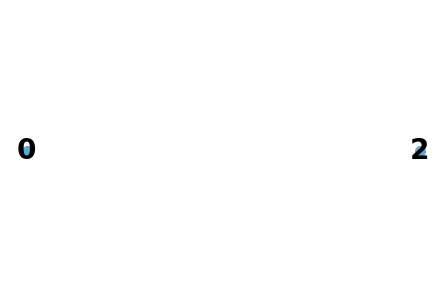

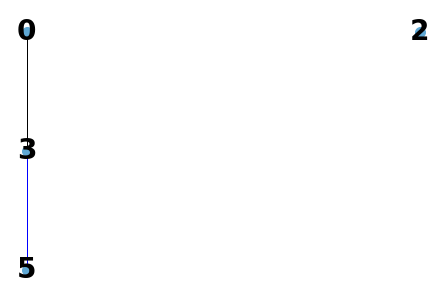

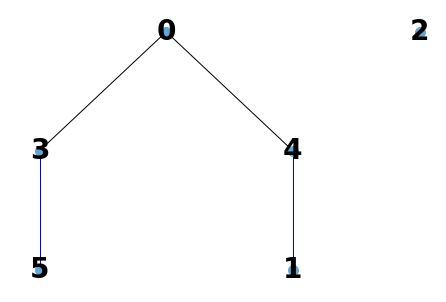

root 0 {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
0 [0] {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
root 5 {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
5 [5, 3, 0] {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
CYCLE
0 0 0 0 __ 0 [0] [5, 3, 0]
[0, 5, 3] 0
AAAAAAAAAAAAAAAAAA
0 {6, 7}
0 {1, 2, 4, 6, 7}


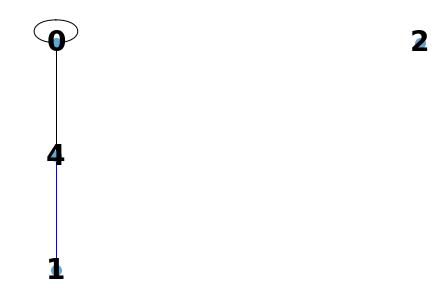

root 0 {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
0 [0] {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
root 1 {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
1 [1, 4, 0] {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
CYCLE
0 0 0 0 __ 0 [0] [1, 4, 0]
[0, 1, 4] 0
AAAAAAAAAAAAAAAAAA
0 {2, 4, 6, 7}
0 {2, 6, 7}


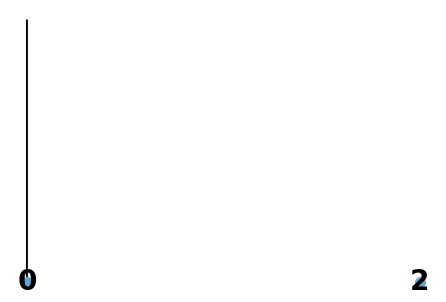

root 0 {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
0 [0] {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
root 2 {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
2 [2] {0: -1, 2: -1, 3: 0, 5: 3, 4: 0, 1: 4}
___ blossoms
{0: [0, 1, 4]}
{0: 0}
PATH [0, 2]
0 Head, 1
4
0
[1, 4]
[1, 4]


[0, 4, 1, 2]

In [201]:
find_augmented(100,vs, edges, pairs)

In [195]:

# def solution(banana_list):
#     graph = []


def infinite2(n1, n2):
    visited = set()
    while n1 != n2:
        if n2 < n1: # sort n1 < n2
            n1, n2 = n2, n1
        if (n1, n2) in visited:
            # print("infinite\n")
            return True
        visited.add((n1,n2)) # add only once in a while
        n1, n2 = n1*2, n2 - n1
    # print(n1, n2)
    # print("equal\n")
    return False

# diff = n2 - n1
# diff = abs(n2 - 3*n1)
# n2, n1
# n2 - n1, 2n1
# n2 - 3n1, 4n1
# n2 - 7n1, 8n1
# n2 - 15n1, 16n1
# n2 - (2^k-1)n1, 2^kn2

# (1*15 + 1)n1, n2-15n1
# (2*15 + 1)n1 - n2, 2*n2 - 2*15n1
# (4*15 + 1)n1 - 3*n2, 4*n2 - 4*15n1
# (2^k*15 + 1)n1 - (2^k - 1)n2, (2^k)n2-(2^k*15)n1


# (2^k)n2 - (2^k*15)n1, (2^k*15 + 1)n1 - (2^k - 1)n2
# (2*2^k-1)n2 - (2*2^k*15+1)n1, 2*(2^k*15 + 1)n1 - 2*(2^k - 1)n2
# (4*2^k-3)n2 - (4*2^k*15+3)n1, 4*(2^k*15 + 1)n1 - 4*(2^k - 1)n2
# (2^m*2^k-(2^m-1))n2 - (2^m*2^k*15+(2^m-1))n1, (2^m2^k*15 + 2^m)n1 - (2^m2^k - 2^m)n2
# # diff =  
# import time
# print("A")
# s = time.time()
# for i in range(100000):
#     x = [j for j in range(i)]
# print("H", time.time() - s)
# import random
